In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import reset_ramsey
from statsmodels.graphics.regressionplots import plot_partregress_grid
import scipy.stats as stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#2 Import a CSV into a Pandas dataframe and inspect the top five rows
df = pd.read_csv('WHR2023.csv')
df.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [3]:
#Check the data types for each variable
df.dtypes

Country name                                   object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
Dystopia + residual         

In [4]:
#3 Summary Statistics
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,1.370000e+02,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,136.000000
mean,5.539796,0.064715,5.666526,5.412971,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401,1.778000e+00,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898,1.777838
std,1.139929,0.023031,1.117421,1.163724,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956,2.897173e-15,0.432963,0.326322,0.156691,0.149501,0.076053,0.126723,0.504390
min,1.859000,0.029000,1.923000,1.795000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000,1.778000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000
25%,4.724000,0.047000,4.980000,4.496000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000,1.778000e+00,1.099000,0.962000,0.248500,0.455000,0.097000,0.060000,1.555250
50%,5.684000,0.060000,5.797000,5.529000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000,1.778000e+00,1.449000,1.227000,0.389500,0.557000,0.137000,0.111000,1.848500
75%,6.334000,0.077000,6.441000,6.243000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000,1.778000e+00,1.798000,1.401000,0.487500,0.656000,0.199000,0.187000,2.078750
max,7.804000,0.147000,7.875000,7.733000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000,1.778000e+00,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000,2.955000


/Library/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

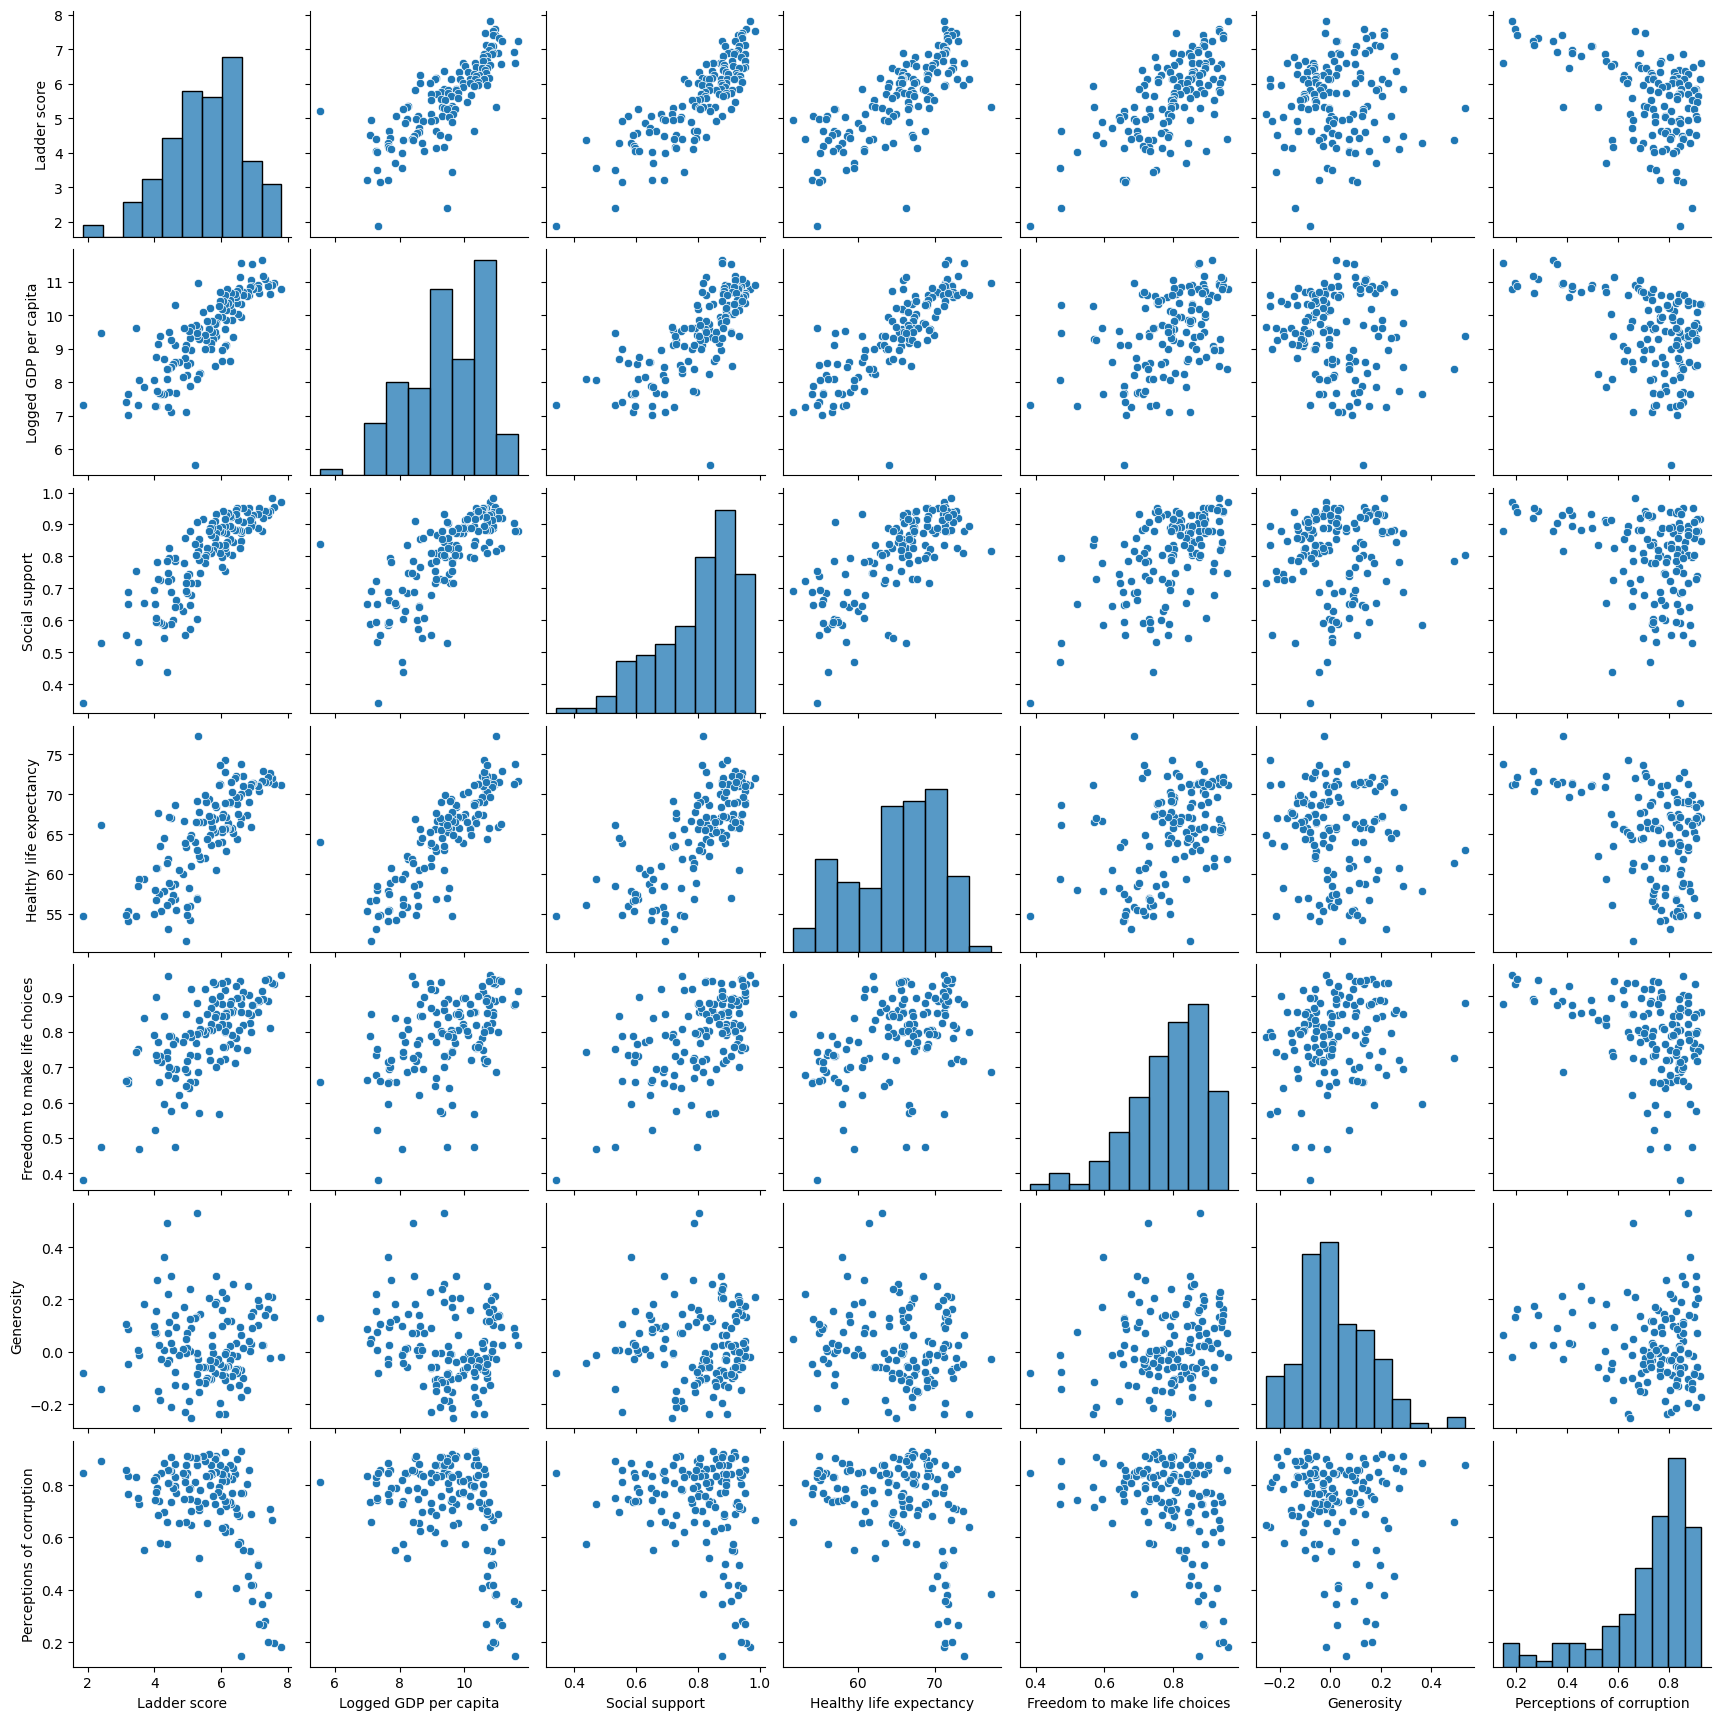

In [7]:
#4 Using Seaborn's pairplot to create the big graphic containing all the different variables plotted against each other
y = df['Ladder score']
xvars = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
X = df[xvars]

#Combine dependent and independent variables for pairplot
df_pairplot = pd.concat ([y, X], axis=1)
sns.pairplot(df_pairplot)
plt.show()

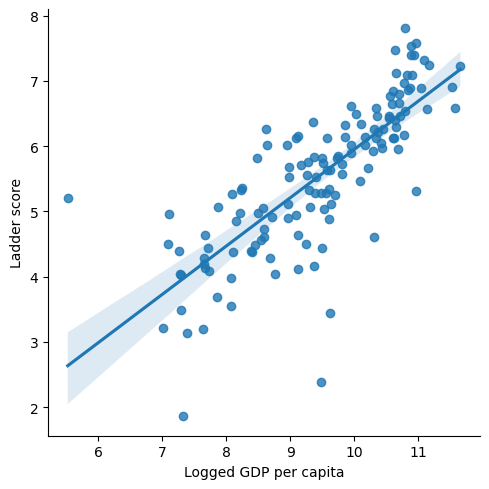

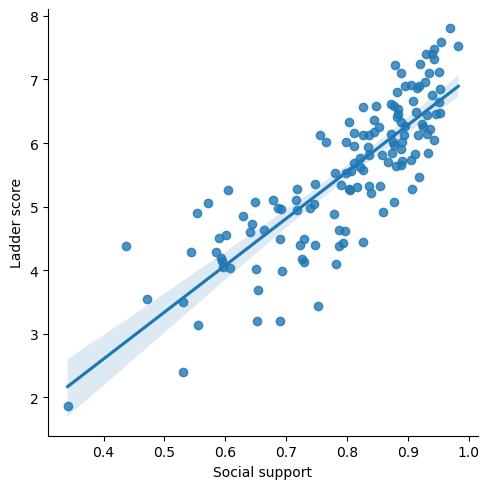

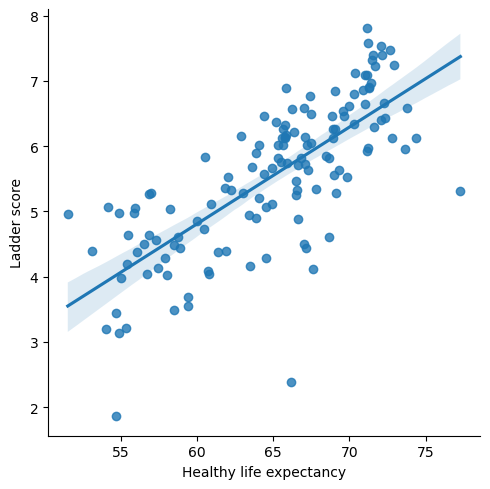

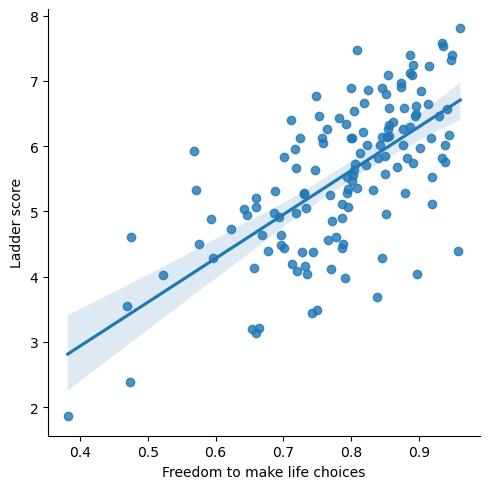

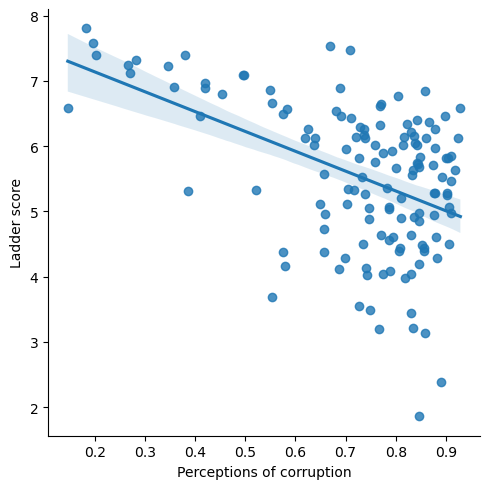

In [8]:
#5 Creating a list of independent variables and using a loop to create a plot of each one against the dependent variable
xvars = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption']

for i in xvars:
    sns.lmplot(x=i,y='Ladder score' , fit_reg=True, data=df)

In [13]:
#Add a constant to the independent variables data frame so that the regression includes an intercept term
X = sm.add_constant(X)
X.head()

,const,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.0,10.792,0.969,71.150,0.961,-0.019,0.182
1,1.0,10.962,0.954,71.250,0.934,0.134,0.196
2,1.0,10.896,0.983,72.050,0.936,0.211,0.668
3,1.0,10.639,0.943,72.697,0.809,-0.023,0.708
4,1.0,10.942,0.930,71.550,0.887,0.213,0.379


In [14]:
#6 Creating three different linear regression models using subsets independent variables and printing the regression results for each
model1 = sm.OLS.from_formula('Q("Ladder score") ~ Q("Logged GDP per capita") + Q("Social support")',df)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Q("Ladder score")   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     210.7
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           4.22e-42
Time:                        17:05:48   Log-Likelihood:                -114.43
No. Observations:                 137   AIC:                             234.9
Df Residuals:                     134   BIC:                             243.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.7190      0.383     -4.491      0.000      -2.476      -0.962
Q("Logged GDP per capita")     0.3493      0.059      5.883      0.000       0.232       0.467
Q("Social support")            4.9530      0.555      8.929      0.000       3.856       6.050
==============================================================================
Omnibus:                       10.186   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.550
Skew:                          -0.569   Prob(JB):                      0.00512
Kurtosis:                       3.744   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#Gather Regression Statistics
rsquared1 = results1.rsquared
adj_rsquared1 = results1.rsquared_adj
parameters1 = results1.params
tvalues1 = results1.tvalues
pvalues1 = results1.pvalues
fstat1 = results1.fvalue
aic1 = results1.aic
bic1 = results1.bic
ci1 = results1.conf_int(alpha=0.01)

In [16]:
model2 = sm.OLS.from_formula('Q("Ladder score") ~ Q("Social support") + Q("Healthy life expectancy") + Q("Freedom to make life choices")', data=df)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Q("Ladder score")   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     175.3
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           7.50e-46
Time:                        17:06:03   Log-Likelihood:                -101.40
No. Observations:                 136   AIC:                             210.8
Df Residuals:                     132   BIC:                             222.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -3.7370      0.552     -6.768      0.000      -4.829      -2.645
Q("Social support")                   4.2202      0.543      7.773      0.000       3.146       5.294
Q("Healthy life expectancy")          0.0561      0.011      4.976      0.000       0.034       0.078
Q("Freedom to make life choices")     2.8792      0.473      6.086      0.000       1.943       3.815
==============================================================================
Omnibus:                        3.255   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                3.026
Skew:                          -0.365   Prob(JB):                        0.220
Kurtosis:                       3.014   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#Gathering regression statistics and values for model2
rsquared2 = results2.rsquared
adj_rsquared2 = results2.rsquared_adj
aic2 = results2.aic
bic2 = results2.bic

In [18]:
model3 = sm.OLS.from_formula('Q("Ladder score") ~ Q("Freedom to make life choices") + Q("Generosity") + Q("Perceptions of corruption")', data=df)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Q("Ladder score")   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     44.71
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           4.76e-20
Time:                        17:06:15   Log-Likelihood:                -164.06
No. Observations:                 137   AIC:                             336.1
Df Residuals:                     133   BIC:                             347.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             2.1616      0.713      3.032      0.003       0.751       3.572
Q("Freedom to make life choices")     5.8582      0.678      8.637      0.000       4.517       7.200
Q("Generosity")                      -0.6936      0.500     -1.386      0.168      -1.683       0.296
Q("Perceptions of corruption")       -1.6804      0.428     -3.929      0.000      -2.526      -0.834
==============================================================================
Omnibus:                        7.101   Durbin-Watson:                   1.005
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                7.009
Skew:                          -0.552   Prob(JB):                       0.0301
Kurtosis:                       3.106   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#Gathering regression statistics and values for model3
rsquared3 = results3.rsquared
adj_rsquared3 = results3.rsquared_adj
aic3 = results3.aic
bic3 = results3.bic

In [20]:
#7.Comapring model1, model2 and model3

models = ["model1","model2","model3"]
r_squared = [rsquared1, rsquared2, rsquared3]
adj_r_squared = [adj_rsquared1, adj_rsquared2, adj_rsquared3]
aic = [aic1, aic2, aic3]
bic = [bic1, bic2, bic3]

data = {
    "Model" : models,
    "R-squared": r_squared,
    "Adjusted R_squared": adj_r_squared,
    "AIC": aic,
    "BIC": bic
}
df_stats = pd.DataFrame(data)
print(df_stats)

    Model  R-squared  Adjusted R_squared         AIC         BIC
0  model1   0.758754            0.755153  234.864781  243.624724
1  model2   0.799368            0.794808  210.809756  222.460376
2  model3   0.502130            0.490900  336.123957  347.803881


In [21]:
#Selecting the based model based on the comparision above: Model 2 has the greater R-squared and Adj. R- squared value as well as the lowest AIC and BIC

In [22]:
#8 Calculating VIF to check for multicollinearity
#A commonly used threshold is VIF > 5 or VIF > 10 to identify problematic multicollinearity.
# Drop rows with missing or infinite values
X_cleaned = X.dropna().replace([np.inf, -np.inf], np.nan).dropna()

# Fill any remaining NaN values with the mean of each column
X_cleaned = X_cleaned.fillna(X_cleaned.mean())

# Calculate VIF for the cleaned DataFrame
vif = pd.DataFrame()
vif["Variable"] = X_cleaned.columns
vif["VIF"] = [variance_inflation_factor(X_cleaned.values, i) for i in range(X_cleaned.shape[1])]

# Print VIF values
print("Variance Inflation Factor (VIF) for Multicollinearity:")
print(vif)

Variance Inflation Factor (VIF) for Multicollinearity:
                       Variable         VIF
0                         const  293.825108
1         Logged GDP per capita    4.269129
2                Social support    3.012845
3       Healthy life expectancy    3.733627
4  Freedom to make life choices    1.590894
5                    Generosity    1.193907
6     Perceptions of corruption    1.425398


In [23]:
#Variables with VIF greater than 1, 5, and 10
vif_greater_than_1 = vif[vif['VIF'] > 1]['Variable'].tolist()
vif_greater_than_5 = vif[vif['VIF'] > 5]['Variable'].tolist()
vif_greater_than_10 = vif[vif['VIF'] > 10]['Variable'].tolist()
print("Variables with VIF > 1:", vif_greater_than_1)
print("Variables with VIF > 5:", vif_greater_than_5)
print("Variables with VIF > 10:", vif_greater_than_10)

Variables with VIF > 1: ['const', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
Variables with VIF > 5: ['const']
Variables with VIF > 10: ['const']


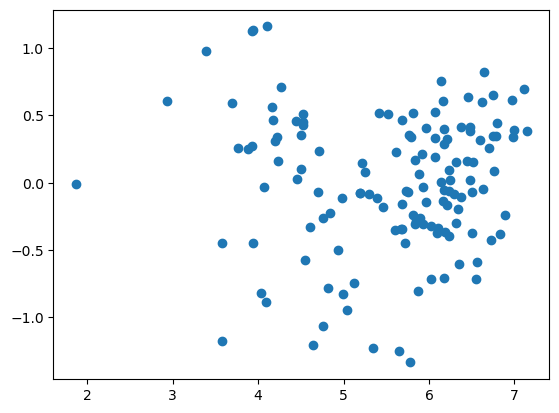

In [24]:
#9 Using the best model to create a variable containing the y-hat and e and making the scatterplot
yhat1 = results2.fittedvalues
e1 = results2.resid
plt.scatter(yhat1, e1)
plt.show()

-1.0425647273597646e-13


(array([ 5.,  3., 10., 15., 20., 27., 27., 21.,  4.,  4.]),
 array([-1.33716728, -1.08724798, -0.83732868, -0.58740938, -0.33749008,
        -0.08757078,  0.16234852,  0.41226782,  0.66218712,  0.91210642,
         1.16202572]),
 <BarContainer object of 10 artists>)

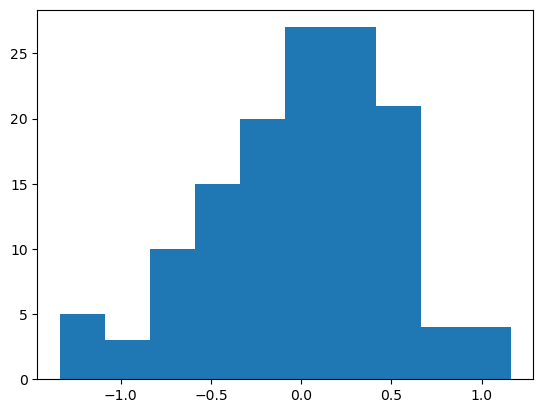

In [25]:
#10 Histogram to check for normally distributed residuals
print(e1.mean())
plt.hist(e1)

In [26]:
#The residuals are normally distributed.

In [27]:
#11 Using Breusch Pagan Statistical test for heteroskedasticity (BP test)

# Drop rows with missing or infinite values in X and e1
X_cleaned = X.dropna().replace([np.inf, -np.inf], np.nan).dropna()
e1_cleaned = e1[X_cleaned.index]

bp_test = het_breuschpagan(e1_cleaned, X_cleaned)
print("Breusch Pagan Test P-Value:", bp_test[3])

# Set the significance level (alpha)
alpha = 0.05

# Interpret the test results
if bp_test[3] < alpha:
    print("There is significant evidence of heteroskedasticity.")
else:
    print("There is not enough evidence to conclude that there is heteroskedasticity.")


Breusch Pagan Test P-Value: 0.05069517970055904
There is not enough evidence to conclude that there is heteroskedasticity.


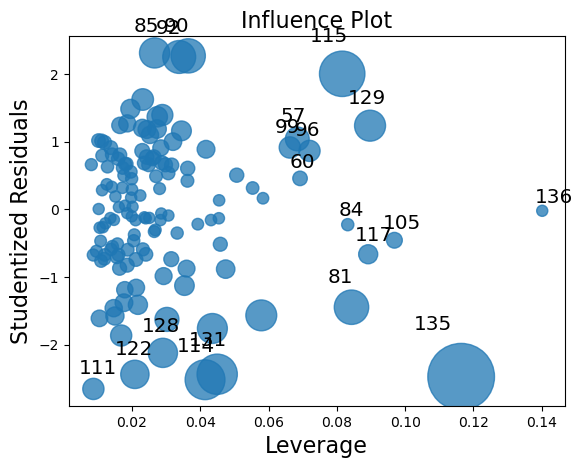

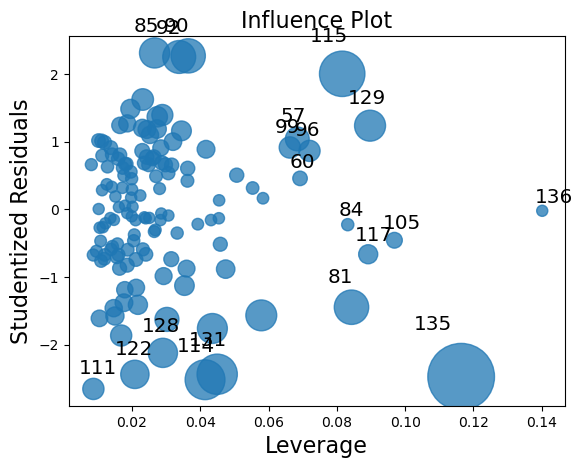

In [28]:
#12. Creating an influence plot to check for outliers
sm.graphics.influence_plot(results2, criterioin = "cooks")

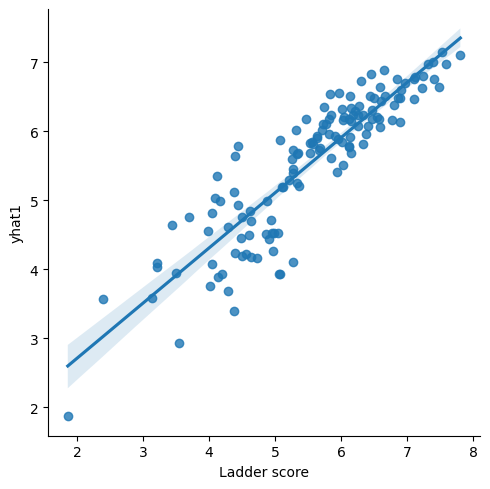

In [29]:
#13 Creating a scatterplot of Y vs Y-Hat including a trendline
df["yhat1"] = yhat1
sns.lmplot(x = "Ladder score", y ="yhat1", fit_reg = True, data=df)

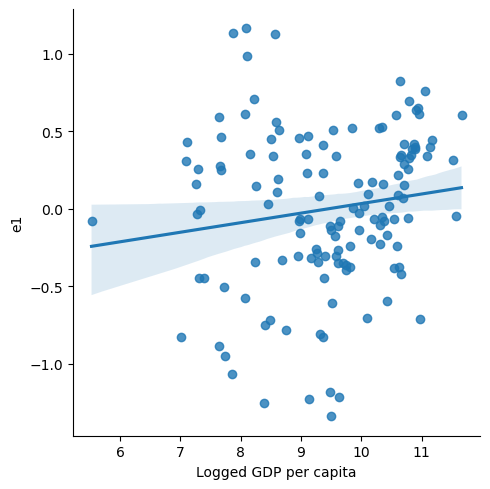

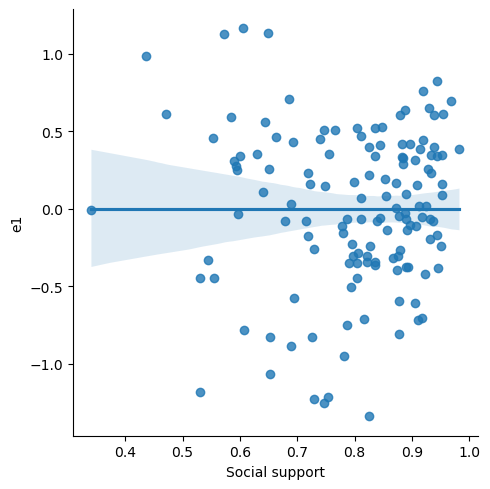

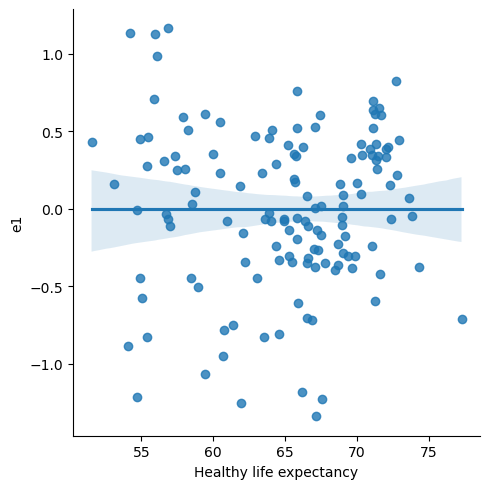

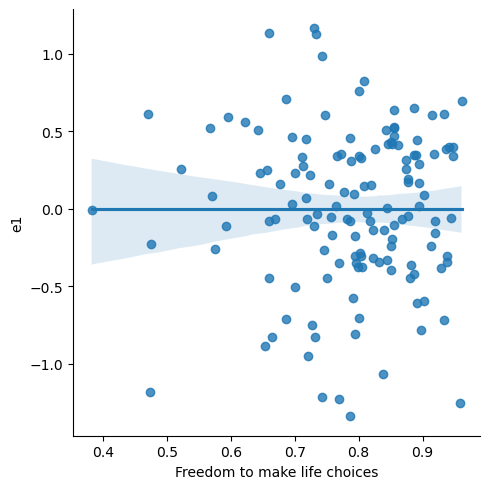

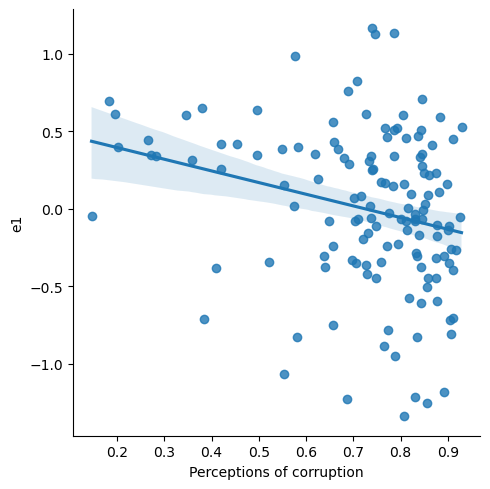

In [30]:
#14 Creating a loop that loops through x-variables and plotting against residuals.
df["e1"] = e1

for i in xvars:
    sns.lmplot(x = i, y = "e1", fit_reg = True, data=df)

In [31]:
#15 Creating a new dataframe and using predict function to calculate estimated y values
new_df = pd.DataFrame({
    "Logged GDP per capita": [13, 12, 11, 10, 9],
    "Social support": [0.99, 0.98, 0.90, 0.85, 0.80],
    "Healthy life expectancy": [76, 75, 70, 69.9, 69.5],
    "Freedom to make life choices": [0.97, 0.96, 0.90, 0.86, 0.80],
    "Perceptions of corruption": [0.3, 0.29, 0.7, 0.5, 0.1]
})
new_df = sm.add_constant(new_df)

new_df["Estimated ladder score"] = results2.predict(new_df)

print(new_df)

   const  Logged GDP per capita  Social support  Healthy life expectancy  \
0    1.0                     13            0.99                     76.0   
1    1.0                     12            0.98                     75.0   
2    1.0                     11            0.90                     70.0   
3    1.0                     10            0.85                     69.9   
4    1.0                      9            0.80                     69.5   

   Freedom to make life choices  Perceptions of corruption  \
0                          0.97                       0.30   
1                          0.96                       0.29   
2                          0.90                       0.70   
3                          0.86                       0.50   
4                          0.80                       0.10   

   Estimated ladder score  
0                7.494306  
1                7.367253  
2                6.576587  
3                6.244799  
4                5.838608  
